(60000, 28, 28) (60000, 10) (10000, 28, 28) (10000, 10)


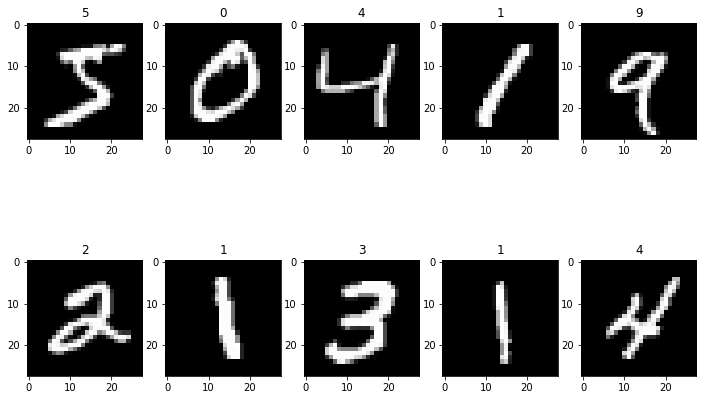

In [43]:
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
np.random.seed(1337)  # for reproducibility

(x_train, y_train), (x_valid, y_valid) = mnist.load_data()
x_train.reshape(-1, 28, 28) / 255.
y_train = to_categorical(y_train, num_classes=10)
x_valid.reshape(-1, 28, 28) / 255.
y_valid = to_categorical(y_valid, num_classes=10)

print(x_train.shape, y_train.shape, x_valid.shape, y_valid.shape)

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(np.argmax(y_train[i], axis=0))
plt.show()

In [24]:
TIME_STEPS = 28
INPUT_SIZE = 28
CELL_SIZE = 50

In [45]:
from keras.layers import SimpleRNN, Activation, Dense, BatchNormalization, LSTM
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()

model.add(LSTM(  # 使用keras封装的模块
    batch_input_shape=(None, TIME_STEPS, INPUT_SIZE),  # 这里可以理解为一个图片28行数据一次送入一行（如果是动态步长，keras实现略显麻烦）
    output_dim=CELL_SIZE,  # 输出为50
    unroll=True,
))

model.add(Dense(10))  # 将50映射到10的空间中
model.add(Activation('softmax'))  # 将打分使用softmax激活为概率

adam = Adam(lr=0.001)
model.compile(optimizer=adam,
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

C:\Users\16957\Miniconda3\envs\DataMining\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=(None, 28,..., unroll=True, units=50)`
  # Remove the CWD from sys.path while we load stuff.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                15800     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                510       
_________________________________________________________________
activation_13 (Activation)   (None, 10)                0         
Total params: 16,310
Trainable params: 16,310
Non-trainable params: 0
_________________________________________________________________


In [46]:
batch_index = 0
batch_size = 50
for step in range(5000):
    # shape为(batch_num, steps, inputs/outputs)
    x_batch = x_train[batch_index: batch_index+batch_size, :, :]  # 一次取64张图片
    y_batch = y_train[batch_index: batch_index+batch_size, :]
    loss = model.train_on_batch(x_batch, y_batch)
    batch_index += batch_size
    batch_index = 0 if batch_index >= x_train.shape[0] else batch_index  # 一旦取完了所有数据，batch索引清空

    if step % 500 == 0:
        cost, accuracy = model.evaluate(x_valid, y_valid, batch_size=y_valid.shape[0], verbose=False)  # 将测试数据全部送入
        print('valid cost: ', cost, 'valid accuracy: ', accuracy)


valid cost:  2.3888072967529297 valid accuracy:  0.07599999755620956
valid cost:  0.7039034366607666 valid accuracy:  0.7657999992370605
valid cost:  0.5678658485412598 valid accuracy:  0.809499979019165
valid cost:  0.5081872940063477 valid accuracy:  0.829200029373169
valid cost:  0.471362441778183 valid accuracy:  0.840399980545044
valid cost:  0.4381416141986847 valid accuracy:  0.8553000092506409
valid cost:  0.4083017408847809 valid accuracy:  0.8619999885559082
valid cost:  0.39126166701316833 valid accuracy:  0.862500011920929
valid cost:  0.36186912655830383 valid accuracy:  0.8779000043869019
valid cost:  0.3686378598213196 valid accuracy:  0.8765000104904175
